In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
import missingno as msno
import plotly

In [551]:
data = pd.read_csv('C:/Users/compf/Documents/Emotions/data/pos.csv')

Exploratory analysis

In [13]:
data.head()

,category,keyword,kinds,name,brand,description,colors,all_colors,has_sizes,reviewerName,text,pros,cons,isObscene,matchingSize,mark,color,size
0,zhenshchinam,Блузки и рубашки,['Женский'],Блузка рубашка женская больших размеров,New Life jersey,"Рубашка в стиле оверсайз - для тех, кто ценит ...","серый,коралловый","[106689516, 69092474, 43951287, 38286805, 5406...",True,Светлана,"Хорошая рубашка, но в темно-сером цвете кажетс...",NaN,NaN,False,ok,5.0,синий,56
1,dachniy-sezon,Полив и водоснабжение,NaN,"Шланг Джилекс ""УДАВ"" 32х1 1/2"" М 9110",джилекс,Шланги и удлинители Джилекс УДАВ представлены ...,белый,"[91965397, 74817118, 74813650]",False,Любовь,"Шланг хороший, но только когда набираем в ёмко...",NaN,NaN,False,NaN,5.0,белый,0
2,detyam/shkola,Учебная литература,NaN,"Развивающие книги для детей, развивашки",Stickybook,Многоразовые тетради для детей Пиши-стирай Син...,NaN,"[44273307, 76422520, 114391123, 63063508, 1098...",False,Анна,Брали в подарок. Всё хорошо.,NaN,NaN,False,NaN,5.0,colorless,0
3,bytovaya-tehnika,Техника для кухни,NaN,Тостер TR81M,BBK,Тостер BBK TR81 - это устройство с высокой мощ...,синий,[11289379],False,Надежда,"Красивый, удобный. Работает.",NaN,NaN,False,NaN,5.0,синий,0
4,muzhchinam,"Пиджаки, жилеты и жакеты",['Женский'],Жилет кожаный жакет женский,SWEET COLD,Асимметричный жилет женский на одно плечо - ХИ...,"черный,черный матовый","[26178045, 34108829, 24692840, 25841499, 40222...",True,Олеся,"Жилет очень похож на кожаный , сидит отлично",NaN,NaN,False,ok,5.0,черный,XXL


In [85]:
categorical_features = data[:1000].select_dtypes(include=[np.object])
categorical_features.columns

C:\Users\compf\AppData\Local\Temp\ipykernel_5308\3219026027.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features = data[:1000].select_dtypes(include=[np.object])


Index(['category', 'keyword', 'kinds', 'name', 'brand', 'description',
       'colors', 'all_colors', 'reviewerName', 'text', 'matchingSize', 'color',
       'size'],
      dtype='object')

<AxesSubplot:>

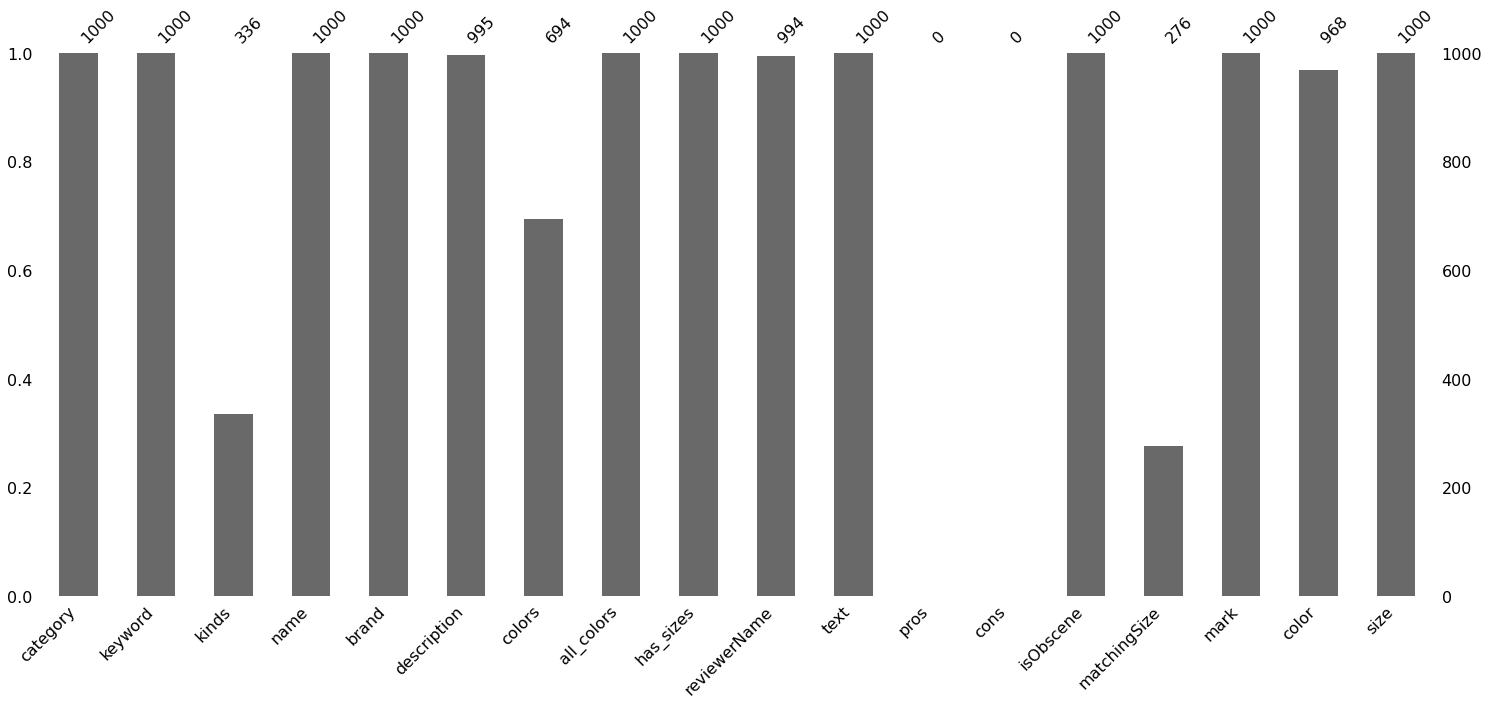

In [86]:
msno.bar(data[:1000].sample(1000))

<AxesSubplot:>

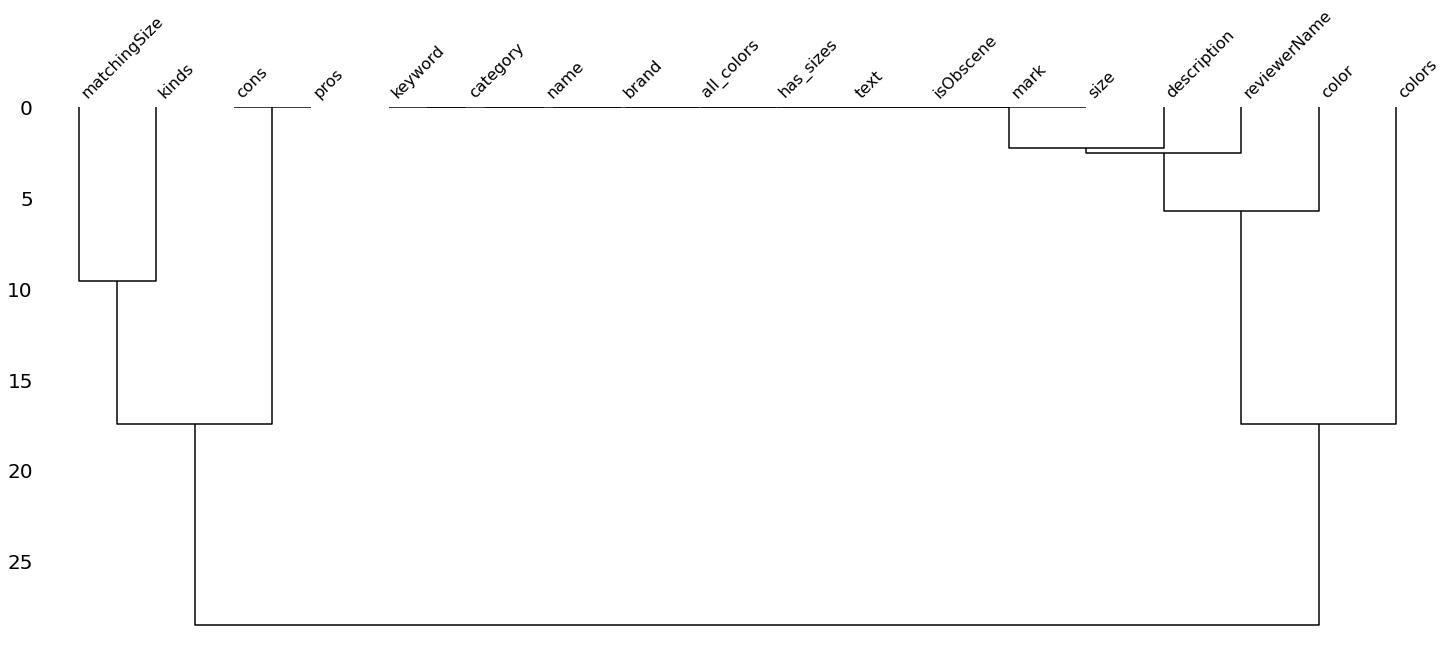

In [87]:
msno.dendrogram(data[:1000])

C:\Users\compf\AppData\Local\Temp\ipykernel_5308\628843013.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, kde=False, fit=st.johnsonsu)
C:\Users\compf\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:4343: RuntimeWarning: divide by zero encountered in log
  trm = _norm_pdf(a + b * np.log(x + np.sqrt(x2+1)))
C:\Users\compf\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_distn_infrastructure.py:1867: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))
C:\Users\compf\AppData\Local\Temp\ipykernel_5308\628843013.py:5: UserWarning: 

`distplot` 

<AxesSubplot:title={'center':'Log Normal'}, xlabel='mark'>

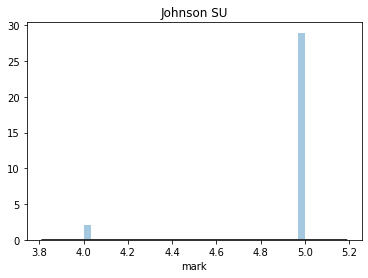

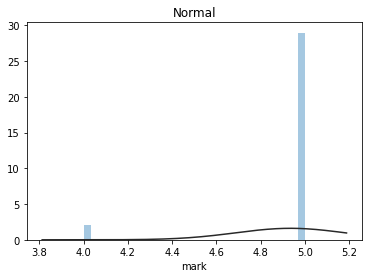

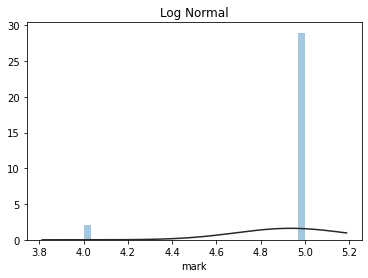

In [88]:
y = data['mark'][:1000]
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

In [89]:
numeric_features = data.select_dtypes(include=[np.number])

numeric_features.columns

Index(['pros', 'cons', 'mark'], dtype='object')

C:\Users\compf\AppData\Local\Temp\ipykernel_5308\760606567.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sns.distplot(data[:1000].skew(),color='blue',axlabel ='Skewness')
C:\Users\compf\AppData\Local\Temp\ipykernel_5308\760606567.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[:1000].skew(),color='blue',axlabel ='Skewness')


<AxesSubplot:xlabel='Skewness', ylabel='Density'>

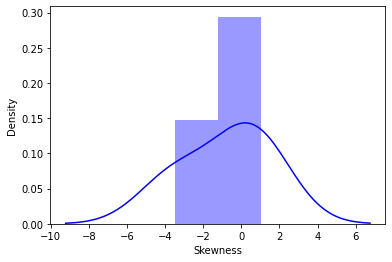

In [91]:
sns.distplot(data[:1000].skew(),color='blue',axlabel ='Skewness')

In [51]:
import re
from pymorphy2 import MorphAnalyzer
from nltk.corpus import stopwords
patterns = "[A-Za-z0-9!#$%&'()*+,./:;<=>?@[\]^_`{|}~—\"\-]+"
stopwords_ru = stopwords.words("russian")
morph = MorphAnalyzer()
def lemmatize(doc):
    doc = re.sub(patterns, ' ', doc)
    tokens = []
    for token in doc.split():
        if token and token not in stopwords_ru:
            token = token.strip()
            token = morph.normal_forms(token)[0]
            tokens.append(token)
    if len(tokens) > 2:
        return tokens
    return None

In [52]:
import nltk

nltk.download("stopwords")
#--------#

from nltk.corpus import stopwords
from pymystem3 import Mystem
from string import punctuation, digits

#Create lemmatizer and stopwords list
mystem = Mystem()
russian_stopwords = stopwords.words("russian")

#Preprocess function
def preprocess_text(text):

    text_no_num = re.sub(r'[0-9]', '', text)
    tokens = mystem.lemmatize(text_no_num.lower())
    tokens = [token for token in tokens if token not in russian_stopwords\
              and token != " " \
              and token.strip() not in punctuation]

    text_no_num = " ".join(tokens)

    return text_no_num

#Examples
preprocess_text("Ну что сказать, я вижу кто-то наступил на грабли, 10 Ты разочаровал меня, ты был натравлен.")
#> 'сказать видеть кто-то наступать грабли разочаровывать натравлять'


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\compf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'сказать видеть кто-то наступать грабли разочаровывать натравлять'

In [95]:
data_pos = data[data['mark'] >= 4.0]
data_pos = data_pos['text']

data_neg = data[data['mark'] <= 3.0]
data_neg = data_neg['text']

In [96]:
data.shape

(127804, 18)

In [ ]:
data_pos_ = []
n = 0
for t in data_pos:
    n+=1
    data_pos_.append(preprocess_text(str(t)))
    if n%100 == 0:
        print(n)

In [61]:
data_pos_

['приятный тело свободный пройма ог рост разм садиться оверсайз хотеть спинка ниже поп спереди закрывать пах ворота немного большеватый ... случай это плюс давить горло )))\n',
 'базовый рубашка норма',
 'подходить размер большой',
 'хороший рубашка',
 'качественный дорогой отличный приобритение',
 'достойный вещь стирать рука ничто случаться ткань любить овер рубашка взять размер большой свой довольный',
 '',
 'рубашка очень хороший качество хороший модель пошив угадывать размер перезаказывать',
 'дочь довольный рубашка овер размер мало размер брать рукав коротковатый',
 'хороший качество угадывать размер перезаказывать',
 'хороший рубпшка',
 'хороший рубашка размер подходить',
 'хороший рубашка',
 'хороший рубашка ткань качество пошив высота',
 'вполне устраивать',
 'отличный рубашка заказывать цвет',
 'очень понравиться фасон ткань слишком огромный свободный мера спасибо именно хотеть ))\n',
 'рубашка суперский сшивать очень аккуратно красивый пуговица радовать состав натуральный ни

In [62]:
import demoji

def handle_emoji(string):
    emojis = demoji.findall(string)

    for emoji in emojis:
        string = string.replace(emoji, " " + emojis[emoji].split(":")[0])

    return string


In [ ]:
data_neg_ = []
n = 0
for t in data_neg[:1000]:
    n+=1
    data_neg_.append(preprocess_text(str(t)))
    if n%100 == 0:
        print(n)

In [64]:
data_neg_

['заказывать р присылать размер дорогой',
 'цвет белоснежный синеватый какой-то главный разочарование это состав хлопок половина синтетика',
 'рубашка очень большой отказ размер',
 'ткань скоро синтетика хлопок жесткий стоять кол',
 'звезда материал приятный тело … остальное ужас !!! фото длинный заказывать жилетка итог приходить ширина необъятный короткий пуп хотя рост см заказывать размер !! абсолютно соответствовать фото карта жизнь поэтому отказ',
 'блузка хороший жаль оказываться брак полочка разный длина',
 'чистый синтетика забирать глядеть дома шок 😡',
 'огромный качество',
 'рубашка картонный стоять кол белый цвет противный синева плюс облегать шея',
 'ужасный качество хрустеть снимать возврат',
 'цвет очень сильно отличаться представлять картинка',
 'соответствовать размер',
 'приятный тело размер единственный минус красить кожа посмотреть стирка становиться хороший',
 'качество ужасный скользкий синтетика !!!',
 'соответствовать размер',
 'ужасный качество',
 'приходить гряз

In [65]:
fd_pos = []
for t in data_pos_:
    fd_pos.append(str(t).split())
print(fd_pos)

[['приятный', 'тело', 'свободный', 'пройма', 'ог', 'рост', 'разм', 'садиться', 'оверсайз', 'хотеть', 'спинка', 'ниже', 'поп', 'спереди', 'закрывать', 'пах', 'ворота', 'немного', 'большеватый', '...', 'случай', 'это', 'плюс', 'давить', 'горло', ')))'], ['базовый', 'рубашка', 'норма'], ['подходить', 'размер', 'большой'], ['хороший', 'рубашка'], ['качественный', 'дорогой', 'отличный', 'приобритение'], ['достойный', 'вещь', 'стирать', 'рука', 'ничто', 'случаться', 'ткань', 'любить', 'овер', 'рубашка', 'взять', 'размер', 'большой', 'свой', 'довольный'], [], ['рубашка', 'очень', 'хороший', 'качество', 'хороший', 'модель', 'пошив', 'угадывать', 'размер', 'перезаказывать'], ['дочь', 'довольный', 'рубашка', 'овер', 'размер', 'мало', 'размер', 'брать', 'рукав', 'коротковатый'], ['хороший', 'качество', 'угадывать', 'размер', 'перезаказывать'], ['хороший', 'рубпшка'], ['хороший', 'рубашка', 'размер', 'подходить'], ['хороший', 'рубашка'], ['хороший', 'рубашка', 'ткань', 'качество', 'пошив', 'высота

In [66]:
fd_pos_flat = sum(fd_pos, [])

In [67]:
fd_pos_flat

['приятный',
 'тело',
 'свободный',
 'пройма',
 'ог',
 'рост',
 'разм',
 'садиться',
 'оверсайз',
 'хотеть',
 'спинка',
 'ниже',
 'поп',
 'спереди',
 'закрывать',
 'пах',
 'ворота',
 'немного',
 'большеватый',
 '...',
 'случай',
 'это',
 'плюс',
 'давить',
 'горло',
 ')))',
 'базовый',
 'рубашка',
 'норма',
 'подходить',
 'размер',
 'большой',
 'хороший',
 'рубашка',
 'качественный',
 'дорогой',
 'отличный',
 'приобритение',
 'достойный',
 'вещь',
 'стирать',
 'рука',
 'ничто',
 'случаться',
 'ткань',
 'любить',
 'овер',
 'рубашка',
 'взять',
 'размер',
 'большой',
 'свой',
 'довольный',
 'рубашка',
 'очень',
 'хороший',
 'качество',
 'хороший',
 'модель',
 'пошив',
 'угадывать',
 'размер',
 'перезаказывать',
 'дочь',
 'довольный',
 'рубашка',
 'овер',
 'размер',
 'мало',
 'размер',
 'брать',
 'рукав',
 'коротковатый',
 'хороший',
 'качество',
 'угадывать',
 'размер',
 'перезаказывать',
 'хороший',
 'рубпшка',
 'хороший',
 'рубашка',
 'размер',
 'подходить',
 'хороший',
 'рубашка',
 'х

[('рубашка', 464), ('размер', 315), ('очень', 232), ('хороший', 221), ('качество', 173), ('отличный', 147), ('приятный', 145), ('блузка', 138), ('ткань', 123), ('цвет', 117), ('понравиться', 116), ('👍', 98), ('заказывать', 89), ('подходить', 86), ('соответствовать', 85), ('тело', 82), ('большой', 74), ('супер', 72), ('классный', 70), ('смотреться', 62)]


C:\Users\compf\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


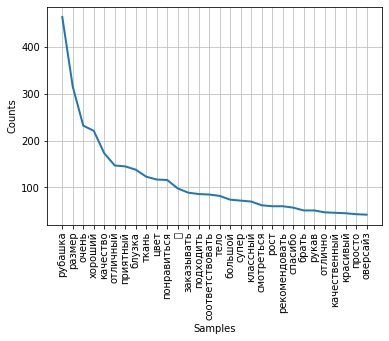

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [68]:
from nltk.probability import FreqDist
fdist = FreqDist(fd_pos_flat)
print(fdist.most_common(20))
fdist.plot(30,cumulative=False)

In [69]:
fd_neg = []
for t in data_neg_:
#     for tt in t:
    fd_neg.append(str(t).split())

print(fd_neg)

[['заказывать', 'р', 'присылать', 'размер', 'дорогой'], ['цвет', 'белоснежный', 'синеватый', 'какой-то', 'главный', 'разочарование', 'это', 'состав', 'хлопок', 'половина', 'синтетика'], ['рубашка', 'очень', 'большой', 'отказ', 'размер'], ['ткань', 'скоро', 'синтетика', 'хлопок', 'жесткий', 'стоять', 'кол'], ['звезда', 'материал', 'приятный', 'тело', '…', 'остальное', 'ужас', '!!!', 'фото', 'длинный', 'заказывать', 'жилетка', 'итог', 'приходить', 'ширина', 'необъятный', 'короткий', 'пуп', 'хотя', 'рост', 'см', 'заказывать', 'размер', '!!', 'абсолютно', 'соответствовать', 'фото', 'карта', 'жизнь', 'поэтому', 'отказ'], ['блузка', 'хороший', 'жаль', 'оказываться', 'брак', 'полочка', 'разный', 'длина'], ['чистый', 'синтетика', 'забирать', 'глядеть', 'дома', 'шок', '😡'], ['огромный', 'качество'], ['рубашка', 'картонный', 'стоять', 'кол', 'белый', 'цвет', 'противный', 'синева', 'плюс', 'облегать', 'шея'], ['ужасный', 'качество', 'хрустеть', 'снимать', 'возврат'], ['цвет', 'очень', 'сильно', '

[('очень', 292), ('размер', 257), ('качество', 227), ('ткань', 122), ('приходить', 121), ('рост', 112), ('заказывать', 110), ('это', 105), ('цвет', 103), ('отказ', 90), ('соответствовать', 85), ('хороший', 83), ('понравиться', 83), ('подходить', 80), ('ужасный', 79), ('большой', 76), ('оказываться', 76), ('рукав', 74), ('тонкий', 74), ('короткий', 73)]


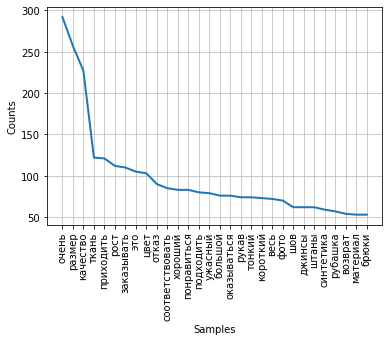

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [70]:
fd_neg_flat = sum(fd_neg, [])
fdist = FreqDist(fd_neg_flat)
print(fdist.most_common(20))
fdist.plot(30,cumulative=False)

In [16]:
from nltk.corpus import stopwords
from wordcloud import WordCloud
import nltk
from nltk.stem import WordNetLemmatizer
# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()
def wordcloud_draw(data, color = 'black'):
    if type(data)!=str:
        data=str(data)
    # words = ' '.join(data)
#     cleaned_word = ' '.join([lemmatizer.lemmatize(w) for w in data])
    a = ['отель', 'номер']
    cleaned_word = " ".join([word for word in data.split()
                            if 'отель' not in word
                            ])
    russian_stopwords = stopwords.words("russian")
    wordcloud = WordCloud(stopwords=russian_stopwords,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

Positive words


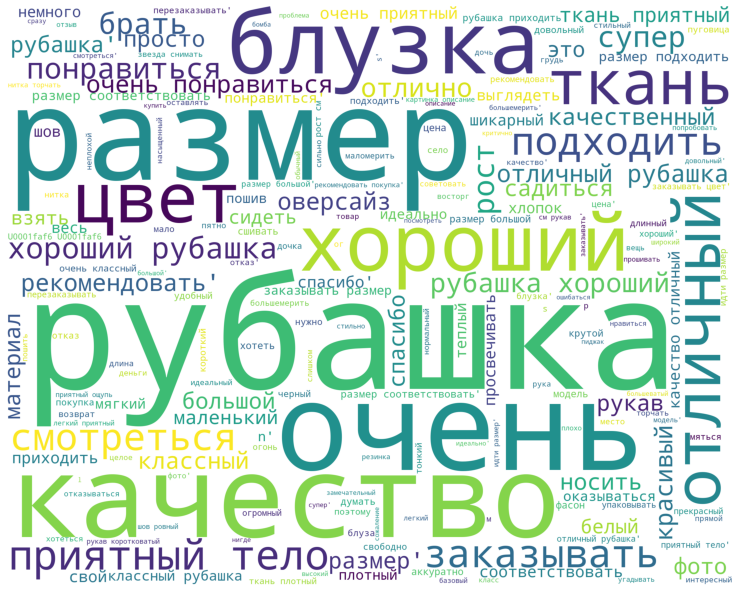

In [72]:
print("Positive words")
wordcloud_draw(data_pos_,'white')

Negative words


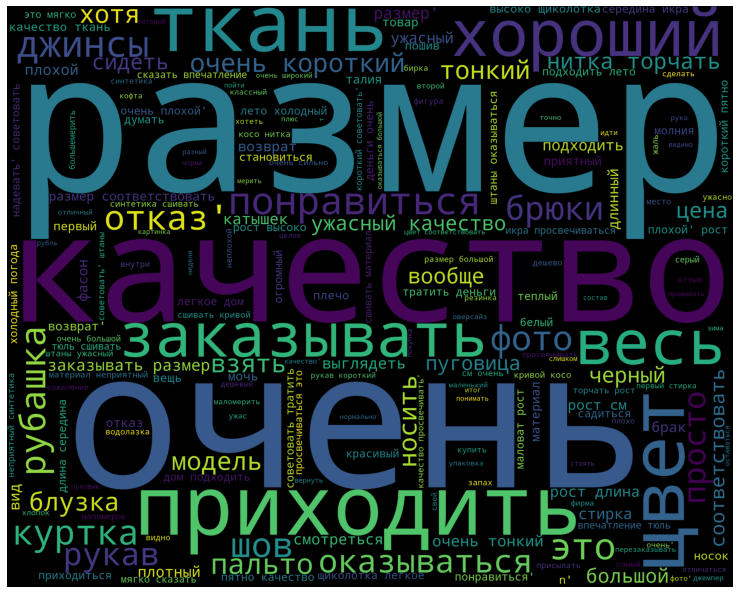

In [73]:
print("Negative words")
wordcloud_draw(data_neg_)

In [10]:
data.describe()

,pros,cons,mark
count,0.0,0.0,127804.000000
mean,NaN,NaN,3.453703
std,NaN,NaN,1.616443
min,NaN,NaN,1.000000
25%,NaN,NaN,2.000000
50%,NaN,NaN,3.500000
75%,NaN,NaN,5.000000
max,NaN,NaN,5.000000


In [ ]:
data_ = []
n = 0
for t in data['text'][:1000]:
    n+=1
    data_.append(preprocess_text(str(t)))

    if n%100 == 0:
        print(n)

In [18]:
dd = pd.DataFrame(data_)
dd.to_csv('C:/Users/compf/Documents/Emotions/data/pos_preprocessed.csv')

In [19]:
data['preprocessed_text'] = dd

In [20]:
data

,category,keyword,kinds,name,brand,description,colors,all_colors,has_sizes,reviewerName,text,pros,cons,isObscene,matchingSize,mark,color,size,preprocessed_text
0,zhenshchinam,Блузки и рубашки,['Женский'],Блузка рубашка женская больших размеров,New Life jersey,"Рубашка в стиле оверсайз - для тех, кто ценит ...","серый,коралловый","[106689516, 69092474, 43951287, 38286805, 5406...",True,Светлана,"Хорошая рубашка, но в темно-сером цвете кажетс...",NaN,NaN,False,ok,5.0,синий,56,хороший рубашка темно-серый цвет кажется плотн...
1,dachniy-sezon,Полив и водоснабжение,NaN,"Шланг Джилекс ""УДАВ"" 32х1 1/2"" М 9110",джилекс,Шланги и удлинители Джилекс УДАВ представлены ...,белый,"[91965397, 74817118, 74813650]",False,Любовь,"Шланг хороший, но только когда набираем в ёмко...",NaN,NaN,False,NaN,5.0,белый,0,шланг хороший набирать емкость вода сгибаться ...
2,detyam/shkola,Учебная литература,NaN,"Развивающие книги для детей, развивашки",Stickybook,Многоразовые тетради для детей Пиши-стирай Син...,NaN,"[44273307, 76422520, 114391123, 63063508, 1098...",False,Анна,Брали в подарок. Всё хорошо.,NaN,NaN,False,NaN,5.0,colorless,0,брать подарок хороший
3,bytovaya-tehnika,Техника для кухни,NaN,Тостер TR81M,BBK,Тостер BBK TR81 - это устройство с высокой мощ...,синий,[11289379],False,Надежда,"Красивый, удобный. Работает.",NaN,NaN,False,NaN,5.0,синий,0,красивый удобный работать
4,muzhchinam,"Пиджаки, жилеты и жакеты",['Женский'],Жилет кожаный жакет женский,SWEET COLD,Асимметричный жилет женский на одно плечо - ХИ...,"черный,черный матовый","[26178045, 34108829, 24692840, 25841499, 40222...",True,Олеся,"Жилет очень похож на кожаный , сидит отлично",NaN,NaN,False,ok,5.0,черный,XXL,жилет очень похожий кожаный сидеть отлично
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63897,elektronika,Детская электроника,NaN,VR очки для смартфона,Kinlem Store,3D очки виртуальной реальности для телефона - ...,NaN,[74674754],False,Анастасия,"За такие деньги, то что нужно. Резкость нужно ...",NaN,NaN,False,NaN,5.0,colorless,0,NaN
63898,zhenshchinam,Для невысоких,['Женский'],Джинсы женские классика на резинке,FEIMAILIS,Зауженные женские джинсы выполнены из приятной...,синий,"[14505420, 109563659, 117975381, 77648709]",True,Анна,Очень удобные,NaN,NaN,False,ok,5.0,синий,48,NaN
63899,krasota,Ногти,NaN,Кисть для наращивания с шпателем,Маманейл,Кисть универсальная овальная с лопаткой для По...,розовый,"[47276881, 18992051, 47276880, 47276878, 47890...",False,Юлия,Отличная кисть,NaN,NaN,False,NaN,5.0,розовый,0,NaN
63900,krasota,Израильская косметика,NaN,Крем для лица увлажняющий питательный,Lab Squeezed,Увлажняющий крем для лица для сухой и нормальн...,NaN,[74578838],False,Полина,Косметика от этого продавца всегда приходит хо...,NaN,NaN,False,NaN,5.0,colorless,0,NaN


In [4]:
data_pos = pd.read_csv('C:/Users/compf/Documents/Emotions/data/pos.csv')
data_neg = pd.read_csv('C:/Users/compf/Documents/Emotions/data/neg.csv')

In [7]:
data_pos_preproc = pd.read_csv('C:/Users/compf/Documents/Emotions/data/pos_preprocessed.csv')
data_neg_preproc = pd.read_csv('C:/Users/compf/Documents/Emotions/data/neg_preprocessed.csv')

In [ ]:
data_pos_preproc

In [ ]:
data_neg_preproc

In [10]:
data_pos['preprocessed'] = data_pos_preproc['0']

In [11]:
df_pos = data_pos[:1000]

In [13]:
data_neg['preprocessed'] = data_neg_preproc['0']

In [14]:
df_neg = data_neg[:1000]

In [16]:
df = pd.concat([df_pos, df_neg])

In [21]:
df

,category,keyword,kinds,name,brand,description,colors,all_colors,has_sizes,reviewerName,text,pros,cons,isObscene,matchingSize,mark,color,size,preprocessed
0,zhenshchinam,Блузки и рубашки,['Женский'],Блузка рубашка женская больших размеров,New Life jersey,"Рубашка в стиле оверсайз - для тех, кто ценит ...","серый,коралловый","[106689516, 69092474, 43951287, 38286805, 5406...",True,Светлана,"Хорошая рубашка, но в темно-сером цвете кажетс...",NaN,NaN,False,ok,5.0,синий,56,хороший рубашка темно-серый цвет кажется плотн...
1,dachniy-sezon,Полив и водоснабжение,NaN,"Шланг Джилекс ""УДАВ"" 32х1 1/2"" М 9110",джилекс,Шланги и удлинители Джилекс УДАВ представлены ...,белый,"[91965397, 74817118, 74813650]",False,Любовь,"Шланг хороший, но только когда набираем в ёмко...",NaN,NaN,False,NaN,5.0,белый,0,шланг хороший набирать емкость вода сгибаться ...
2,detyam/shkola,Учебная литература,NaN,"Развивающие книги для детей, развивашки",Stickybook,Многоразовые тетради для детей Пиши-стирай Син...,NaN,"[44273307, 76422520, 114391123, 63063508, 1098...",False,Анна,Брали в подарок. Всё хорошо.,NaN,NaN,False,NaN,5.0,colorless,0,брать подарок хороший
3,bytovaya-tehnika,Техника для кухни,NaN,Тостер TR81M,BBK,Тостер BBK TR81 - это устройство с высокой мощ...,синий,[11289379],False,Надежда,"Красивый, удобный. Работает.",NaN,NaN,False,NaN,5.0,синий,0,красивый удобный работать
4,muzhchinam,"Пиджаки, жилеты и жакеты",['Женский'],Жилет кожаный жакет женский,SWEET COLD,Асимметричный жилет женский на одно плечо - ХИ...,"черный,черный матовый","[26178045, 34108829, 24692840, 25841499, 40222...",True,Олеся,"Жилет очень похож на кожаный , сидит отлично",NaN,NaN,False,ok,5.0,черный,XXL,жилет очень похожий кожаный сидеть отлично
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,zhenshchinam,Джинсы,['Женский'],Джинсы женские широкие высокая посадка,Florendi,Джинсы женские с высокой посадкой. Модные клас...,"черный,графит","[28602083, 18544991, 16818573, 28566062, 27889...",True,Оксана,Размер не подошёл... А так бы оставила... Хоро...,NaN,NaN,False,smaller,3.0,синий,29,размер подходить ... оставлять ... хороший джинсы
996,zhenshchinam,Джинсы,['Женский'],Джинсы женские широкие высокая посадка,Florendi,Джинсы женские с высокой посадкой. Модные клас...,"черный,графит","[28602083, 18544991, 16818573, 28566062, 27889...",True,Арина,"Заказала свой размер, даже больше, оказались м...",NaN,NaN,False,smaller,1.0,серый,29,заказывать свой размер оказываться маленький о...
997,zhenshchinam,Джинсы,['Женский'],Джинсы женские широкие высокая посадка,Florendi,Джинсы женские с высокой посадкой. Модные клас...,"черный,графит","[28602083, 18544991, 16818573, 28566062, 27889...",True,Ангелина,Пришёл не тот цвет,NaN,NaN,False,ok,1.0,синий,29,приходить цвет
998,zhenshchinam,Джинсы,['Женский'],Джинсы женские клеш широкие палаццо,Белая.,ПРИ ВЫБОРЕ РАЗМЕРА ДЖИНС ОБЯЗАТЕЛЬНО ОРИЕНТИРУ...,"черный,черный меланж,черный матовый,черный гра...","[58776360, 116812530, 116812901]",True,Дарья,"взяла самый маленький размер, оказались очень ...",NaN,NaN,False,bigger,3.0,черный,25,взять самый маленький размер оказываться очень...


In [22]:
df_dropna = df[['mark']].dropna()

<AxesSubplot:ylabel='mark'>

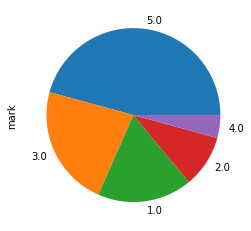

In [23]:
df_dropna['mark'].value_counts().plot(kind='pie')

In [ ]:
df_dropna['mark'].value_counts()

Baseline

In [25]:
# data_train = []
# n = 0
# for t in data['text'][:1000]:
#     n+=1
#     data_train.append(preprocess_text(str(t)))
#     if n%100==0:
#         print(n)

In [26]:
# df = pd.DataFrame(data_train, columns=['text'])
# df.to_csv('../data/27181_all_cards_preprocessed.csv', mode='a', header=False, index=False)

In [27]:
# data_test = []
# n = 0
# for t in data['text'][1000:1500]:
#     n+=1
#     data_test.append(preprocess_text(str(t)))
#     if n%100==0:
#         print(n)

In [28]:
# data_train

In [32]:
voc = []
for d in df['preprocessed']:
    voc.append(str(d).split())

In [ ]:
voc

In [ ]:
%%time
from gensim.models import FastText, Word2Vec
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

fasttext_model = FastText(voc, vector_size=500, window=7, min_count=5, workers=4,sg=1)
word2vec_model = Word2Vec(voc, vector_size=500, window=7, min_count=5, workers=4,sg=1)
# fasttext_model = FastText.load_fasttext_format("../input/fast100/cc.en.100.bin")

In [ ]:
fasttext_model.save("FastText-Model-For-ABSA.bin")

In [ ]:
fasttext_model.wv.n_similarity("серый", "качество")

In [ ]:
fasttext_model.wv.n_similarity("цвет", "доставка")

In [ ]:
print(len(fasttext_model.wv.index_to_key))

In [ ]:
fasttext_model.wv.index_to_key

In [ ]:
word2vec_model.save("Word2Vec-Model-For-ABSA.bin")


In [ ]:
word2vec_model.wv.n_similarity("цвет", "нитки")

In [ ]:
print(len(word2vec_model.wv.index_to_key))

In [142]:
aspects = ["размер", "качество", "цвет", "цена", "материал", "доставка"]

def get_similarity(text, aspect):
    try:
        text = " ".join(text)
        return fasttext_model.wv.n_similarity(text, aspect)
    except:
        return 0

In [ ]:
dff = pd.DataFrame({"размер": [], "качество": [], "цвет": [], "цена": [], "материал": [], "доставка": []})
dff

In [149]:
from tqdm import tqdm
tqdm.pandas()
for aspect in aspects:
    dff[aspect] = df['preprocessed'].progress_map(lambda text: get_similarity(text, aspect))

100%|██████████| 2000/2000 [00:02<00:00, 686.34it/s]


In [154]:
dff

,размер,качество,цвет,цена,материал,доставка
0,0.990951,0.989884,0.990455,0.053126,0.991252,0.988306
1,0.983879,0.983239,0.983039,0.054420,0.984380,0.982317
2,0.994102,0.992249,0.992607,0.039535,0.994178,0.991315
3,0.994703,0.993061,0.993620,0.043318,0.994941,0.992164
4,0.962767,0.963932,0.962926,0.067499,0.963661,0.961999
...,...,...,...,...,...,...
995,0.981497,0.980531,0.980638,0.050696,0.981816,0.979564
996,0.974834,0.975098,0.974219,0.063390,0.975317,0.974111
997,0.990539,0.989131,0.990547,0.046747,0.990818,0.987694
998,0.984858,0.984205,0.984123,0.054153,0.985243,0.982849


In [ ]:
main_aspect = []

# for d in dff:
#     dd = pd.DataFrame({"размер": [d[0]], "качество": [d[1]], "цвет": [d[2]], "цена": [d[3]], "материал": [d[4]], "доставка": [d[5]]})
#     main_aspect.append(dd.idxmax(axis=1))
main_aspect = dff.idxmax(axis=1)
main_aspect

In [ ]:
df

In [ ]:
please_be_final = please_be_final.drop('0', axis=1)

In [ ]:
please_be_final.to_csv('final.csv')

In [182]:
from sklearn.model_selection import train_test_split
X = please_be_final['text']
y = pd.concat([please_be_final['mark'], please_be_final['aspect']], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
X_train

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
#transformed train reviews
cv_train_reviews=cv.fit_transform(X_train)
#transformed test reviews
cv_test_reviews=cv.transform(X_test)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)

In [185]:
train_sentiments = y_train['mark']

In [186]:
test_sentiments = y_test['mark']

In [ ]:
train_sentiments.value_counts()

In [ ]:
test_sentiments.value_counts()

In [205]:
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

def auto_classifier(classifier, X_train, y_train):
  if classifier == 'SVC':
    parameters = {'C':[0.1, 2, 3, 5],
                  'penalty': ['l1', 'l2'],
                  'loss':['hinge', 'squared_hinge'],
                  'class_weight': ['balanced', None]}
    clf = LinearSVC()
  elif classifier == 'KNN':
    parameters = {'n_neighbors':[2, 3, 5, 7, 14, 20, 50],
                  'weights':['uniform', 'distance'],
                  'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
                  'leaf_size':[5, 10, 30, 50, 100],
                  'p': [1, 2],
                  'n_jobs':[2, 4, 8]}
    clf = KNeighborsClassifier()
  elif classifier == 'tree':
    parameters = {'max_depth':[2, 3, 4, 5, 6, 7, 8, 9, 10],
                  'criterion':['gini', 'entropy', 'log_loss'],
                  'class_weight':['balanced', 'balanced_subsample', None]}
    clf = DecisionTreeClassifier()
  elif classifier == 'forest':
    parameters = {'max_depth':[2, 3, 4, 5, 6, 7, 8, 9, 10],
                  'criterion':['gini', 'entropy', 'log_loss'],
                  'class_weight':['balanced', 'balanced_subsample', None]}
    clf = RandomForestClassifier()
  elif classifier == 'logreg':
    parameters = {'C':[0.1, 2, 3, 5],
                  'penalty':['l1', 'l2', 'elasticnet', None],
                  'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
                  'class_weight':['balanced', 'balanced_subsample', None]}
    clf = LogisticRegression()
  elif classifier == 'SGD':
    parameters = {'loss':['hinge', 'log_loss', 'log', 'modified_huber',
                        'squared_hinge', 'perceptron', 'squared_error', 'huber',
                        'epsilon_insensitive', 'squared_epsilon_insensitive'],
                  'penalty':['l2', 'l1', 'elasticnet', None]}
    clf = SGDClassifier()

  Gs=GridSearchCV(estimator=clf, param_grid=parameters)
  Gs.fit(X_train, y_train)
  results_df = pd.DataFrame(Gs.cv_results_)
  results_df = results_df.sort_values(by=["rank_test_score"])
  results_df = results_df.set_index(
      results_df["params"].apply(lambda x: "_".join(str(val) for val in x.values()))
  )
  return results_df[["params", "rank_test_score", "mean_test_score"]]

In [206]:
auto_classifier('SVC', cv_train_reviews,train_sentiments)

C:\Users\compf\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\compf\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\compf\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_classes.py", line 257, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "C:\Users\compf\AppData\Local\Programs\Python\Python39\li

,params,rank_test_score,mean_test_score
params,,,
0.1_balanced_hinge_l2,"{'C': 0.1, 'class_weight': 'balanced', 'loss':...",1,0.465672
0.1_balanced_squared_hinge_l2,"{'C': 0.1, 'class_weight': 'balanced', 'loss':...",1,0.465672
0.1_None_hinge_l2,"{'C': 0.1, 'class_weight': None, 'loss': 'hing...",1,0.465672
0.1_None_squared_hinge_l2,"{'C': 0.1, 'class_weight': None, 'loss': 'squa...",1,0.465672
5_None_hinge_l2,"{'C': 5, 'class_weight': None, 'loss': 'hinge'...",5,0.271642
2_None_hinge_l2,"{'C': 2, 'class_weight': None, 'loss': 'hinge'...",6,0.252239
5_balanced_hinge_l2,"{'C': 5, 'class_weight': 'balanced', 'loss': '...",7,0.201493
2_None_squared_hinge_l2,"{'C': 2, 'class_weight': None, 'loss': 'square...",8,0.193284
3_None_squared_hinge_l2,"{'C': 3, 'class_weight': None, 'loss': 'square...",8,0.193284


In [207]:
auto_classifier('KNN', cv_train_reviews,train_sentiments)

C:\Users\compf\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\compf\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\compf\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\compf\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\Users\compf\AppData\Local\Pro

,params,rank_test_score,mean_test_score
params,,,
auto_50_2_5_1_uniform,"{'algorithm': 'auto', 'leaf_size': 50, 'n_jobs...",1,0.229851
auto_30_8_5_2_distance,"{'algorithm': 'auto', 'leaf_size': 30, 'n_jobs...",1,0.229851
auto_30_8_5_2_uniform,"{'algorithm': 'auto', 'leaf_size': 30, 'n_jobs...",1,0.229851
auto_30_8_5_1_distance,"{'algorithm': 'auto', 'leaf_size': 30, 'n_jobs...",1,0.229851
auto_30_8_5_1_uniform,"{'algorithm': 'auto', 'leaf_size': 30, 'n_jobs...",1,0.229851
...,...,...,...
kd_tree_100_8_3_2_distance,"{'algorithm': 'kd_tree', 'leaf_size': 100, 'n_...",1441,0.099254
ball_tree_5_2_3_2_distance,"{'algorithm': 'ball_tree', 'leaf_size': 5, 'n_...",1441,0.099254
ball_tree_5_2_3_2_uniform,"{'algorithm': 'ball_tree', 'leaf_size': 5, 'n_...",1441,0.099254


In [208]:
auto_classifier('tree', cv_train_reviews,train_sentiments)

C:\Users\compf\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
225 fits failed out of a total of 405.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\compf\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\compf\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\compf\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py", li

,params,rank_test_score,mean_test_score
params,,,
None_gini_6,"{'class_weight': None, 'criterion': 'gini', 'm...",1,0.465672
None_gini_3,"{'class_weight': None, 'criterion': 'gini', 'm...",1,0.465672
None_gini_4,"{'class_weight': None, 'criterion': 'gini', 'm...",1,0.465672
None_gini_5,"{'class_weight': None, 'criterion': 'gini', 'm...",1,0.465672
None_entropy_10,"{'class_weight': None, 'criterion': 'entropy',...",1,0.465672
...,...,...,...
balanced_subsample_entropy_10,"{'class_weight': 'balanced_subsample', 'criter...",77,NaN
balanced_subsample_log_loss_2,"{'class_weight': 'balanced_subsample', 'criter...",78,NaN
balanced_subsample_log_loss_3,"{'class_weight': 'balanced_subsample', 'criter...",79,NaN


In [209]:
auto_classifier('forest', cv_train_reviews,train_sentiments)

C:\Users\compf\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
135 fits failed out of a total of 405.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\compf\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\compf\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\compf\AppData\Local\Programs\Python\Python39\lib\site-packages\joblib\parallel.py",

,params,rank_test_score,mean_test_score
params,,,
balanced_subsample_entropy_6,"{'class_weight': 'balanced_subsample', 'criter...",1,0.465672
None_gini_3,"{'class_weight': None, 'criterion': 'gini', 'm...",1,0.465672
None_gini_9,"{'class_weight': None, 'criterion': 'gini', 'm...",1,0.465672
None_gini_8,"{'class_weight': None, 'criterion': 'gini', 'm...",1,0.465672
balanced_subsample_gini_3,"{'class_weight': 'balanced_subsample', 'criter...",1,0.465672
...,...,...,...
balanced_subsample_log_loss_6,"{'class_weight': 'balanced_subsample', 'criter...",77,NaN
balanced_subsample_log_loss_10,"{'class_weight': 'balanced_subsample', 'criter...",78,NaN
balanced_subsample_log_loss_9,"{'class_weight': 'balanced_subsample', 'criter...",79,NaN


In [204]:
auto_classifier('logreg', cv_train_reviews,train_sentiments)

C:\Users\compf\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\compf\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\compf\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\compf\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\compf\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_

,params,rank_test_score,mean_test_score
params,,,
3_l2_newton-cg,"{'C': 3, 'penalty': 'l2', 'solver': 'newton-cg'}",1,0.465672
2_l2_saga,"{'C': 2, 'penalty': 'l2', 'solver': 'saga'}",1,0.465672
2_l2_sag,"{'C': 2, 'penalty': 'l2', 'solver': 'sag'}",1,0.465672
5_l1_liblinear,"{'C': 5, 'penalty': 'l1', 'solver': 'liblinear'}",1,0.465672
2_l2_newton-cg,"{'C': 2, 'penalty': 'l2', 'solver': 'newton-cg'}",1,0.465672
...,...,...,...
2_elasticnet_lbfgs,"{'C': 2, 'penalty': 'elasticnet', 'solver': 'l...",92,NaN
2_l2_newton-cholesky,"{'C': 2, 'penalty': 'l2', 'solver': 'newton-ch...",93,NaN
2_l1_sag,"{'C': 2, 'penalty': 'l1', 'solver': 'sag'}",94,NaN


In [202]:
auto_classifier('SGD', cv_train_reviews,train_sentiments)

C:\Users\compf\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\compf\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\compf\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py", line 883, in fit
    return self._fit(
  File "C:\Users\compf\AppData\Local\Programs\Python\Python39\lib\site-packages\sklea

,params,rank_test_score,mean_test_score
params,,,
log_l1,"{'loss': 'log', 'penalty': 'l1'}",1,0.465672
squared_error_None,"{'loss': 'squared_error', 'penalty': None}",1,0.465672
huber_l1,"{'loss': 'huber', 'penalty': 'l1'}",1,0.465672
huber_elasticnet,"{'loss': 'huber', 'penalty': 'elasticnet'}",1,0.465672
hinge_None,"{'loss': 'hinge', 'penalty': None}",5,0.369403
squared_error_elasticnet,"{'loss': 'squared_error', 'penalty': 'elasticn...",6,0.332836
squared_error_l2,"{'loss': 'squared_error', 'penalty': 'l2'}",7,0.331343
hinge_elasticnet,"{'loss': 'hinge', 'penalty': 'elasticnet'}",8,0.311194
hinge_l2,"{'loss': 'hinge', 'penalty': 'l2'}",9,0.295522


In [ ]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
#training the model
lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42, class_weight={5:1, 4:6, 3:2, 2:4, 1:2})
#Fitting the model for Bag of words
lr_bow=lr.fit(cv_train_reviews,train_sentiments)
print(lr_bow)
lr_bow=lr.fit(cv_test_reviews,test_sentiments)
print(lr_bow)
#Fitting the model for tfidf features
# lr_tfidf=lr.fit(tv_train_reviews,train_sentiments)
# print(lr_tfidf)

In [ ]:
#Predicting the model for bag of words
lr_bow_predict=lr.predict(cv_train_reviews)
print(lr_bow_predict)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
#Accuracy score for bag of words
lr_bow_score=accuracy_score(train_sentiments,lr_bow_predict)
print("lr_bow_score :",lr_bow_score)

In [ ]:
lr_bow_predict=lr.predict(cv_test_reviews)
print(lr_bow_predict)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
#Accuracy score for bag of words
lr_bow_score=accuracy_score(test_sentiments,lr_bow_predict)
print("lr_bow_score :",lr_bow_score)

In [ ]:
#Classification report for bag of words
lr_bow_report=classification_report(test_sentiments,lr_bow_predict,target_names=['5', '4', '3', '2', '1'])
print(lr_bow_report)

In [ ]:
#training the linear svm
svm=SGDClassifier(loss='hinge',max_iter=500,random_state=42, class_weight={5:1, 4:6, 3:15, 2:26, 1:30})
#fitting the svm for bag of words
svm_bow=svm.fit(cv_train_reviews,train_sentiments)
print(svm_bow)

In [ ]:
#Predicting the model for bag of words
svm_bow_predict=svm.predict(cv_test_reviews)
print(svm_bow_predict)

In [ ]:
#Accuracy score for bag of words
svm_bow_score=accuracy_score(test_sentiments,svm_bow_predict)
print("svm_bow_score :",svm_bow_score)

In [ ]:
#Classification report for bag of words
svm_bow_report=classification_report(test_sentiments,svm_bow_predict,target_names=['5', '4', '3', '2', '1'])
print(svm_bow_report)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
#training the model
mnb=MultinomialNB()
#fitting the svm for bag of words
mnb_bow=mnb.fit(cv_train_reviews,train_sentiments)
print(mnb_bow)

In [ ]:
#Predicting the model for bag of words
mnb_bow_predict=mnb.predict(cv_test_reviews)
print(mnb_bow_predict)

In [ ]:
#Accuracy score for bag of words
mnb_bow_score=(test_sentiments,mnb_bow_predict)
print("mnb_bow_score :",mnb_bow_score)

In [ ]:
#Classification report for bag of words
mnb_bow_report=classification_report(test_sentiments,mnb_bow_predict,target_names=['5', '4', '3', '2', '1'])
print(mnb_bow_report)

Transformer model

In [413]:
#transformers
from transformers import BertTokenizerFast
from transformers import TFBertModel
from transformers import RobertaTokenizerFast
from transformers import TFRobertaModel

In [523]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
train_x, train_y = ros.fit_resample(np.array(X).reshape(-1, 1), np.array(y['mark']).reshape(-1, 1));
train_os = pd.DataFrame(list(zip([x[0] for x in train_x], train_y)), columns = ['text', 'mark']);

In [ ]:
train_os

In [ ]:
train_os['mark'].value_counts()

In [ ]:
train_os['mark'].shape

In [527]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_os['text'], train_os['mark'], test_size=0.33, random_state=42)

In [ ]:
X_train

In [529]:
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

In [530]:
MAX_LEN=500
def tokenize(data,max_len=500) :
    input_ids = []
    attention_masks = []
    for i in range(len(data)):
        encoded = tokenizer.encode_plus(
            data[i],
            add_special_tokens=True,
            max_length=MAX_LEN,
            padding='max_length',
            return_attention_mask=True
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
    return np.array(input_ids, dtype = np.int32),np.array(attention_masks, dtype = np.int32)

In [531]:
X_train_ = X_train.reset_index().drop(columns = ['index'])

In [ ]:
X_train_

In [533]:
X_test_ = X_test.reset_index().drop(columns = ['index'])
y_test_ = y_test.reset_index().drop(columns = ['index'])
y_train_ = y_train.reset_index().drop(columns = ['index'])

In [ ]:
X_train_['text'].shape

In [ ]:
X_train_['text']

In [ ]:
train_input_ids, train_attention_masks = tokenize(X_train_['text'], 500)
test_input_ids, test_attention_masks = tokenize(X_test_['text'], 500)

In [ ]:
y_train_.value_counts()

In [ ]:
import tensorflow as tf
train_sentiments_ = tf.keras.utils.to_categorical(y_train_, num_classes=6)
train_sentiments_

In [ ]:
test_sentiments_ = tf.keras.utils.to_categorical(y_test_, num_classes=6)
test_sentiments_

In [ ]:
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

In [ ]:
def create_model(bert_model, max_len=500):

    ##params###
    opt = tf.keras.optimizers.Adam(learning_rate=1e-5, decay=1e-7)
    loss = tf.keras.losses.CategoricalCrossentropy()
    accuracy = tf.keras.metrics.CategoricalAccuracy()


    input_ids = tf.keras.Input(shape=(max_len,),dtype='int32')

    attention_masks = tf.keras.Input(shape=(max_len,),dtype='int32')

    embeddings = bert_model([input_ids,attention_masks])[1]

    output = tf.keras.layers.Dense(6, activation="softmax")(embeddings)

    model = tf.keras.models.Model(inputs = [input_ids,attention_masks], outputs = output)

    model.compile(opt, loss=loss, metrics=accuracy)


    return model
model = create_model(bert_model, MAX_LEN)
model.summary()

In [ ]:
history_bert = model.fit([train_input_ids,train_attention_masks], train_sentiments_, epochs=4, batch_size=16)

In [ ]:
result_bert = model.predict([test_input_ids,test_attention_masks])

In [ ]:
result_bert.shape

In [260]:
y_pred_bert =  np.zeros_like(result_bert)
y_pred_bert[np.arange(len(y_pred_bert)), result_bert.argmax(1)] = 1

In [ ]:
y_pred_bert.shape

In [ ]:
y_pred_bert

In [ ]:
test_sentiments_

In [ ]:
test_sentiments_.shape